In [35]:
import pandas as pd
from mplsoccer import VerticalPitch, FontManager, Pitch
from statsbombpy import sb
import matplotlib.pyplot as plt
import numpy as np

URL = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL)

In [36]:
competitions = sb.competitions()

In [37]:
world_cup_competitions = competitions[competitions['competition_name'].str.contains("FIFA World Cup")]
world_cup_competitions.sort_values(by='season_name')

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
35,43,269,International,FIFA World Cup,male,False,True,1958,2024-02-13T14:22:08.222297,None,None,2024-02-13T14:22:08.222297
34,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984
33,43,272,International,FIFA World Cup,male,False,True,1970,2024-02-13T14:23:06.735299,None,None,2024-02-13T14:23:06.735299
32,43,51,International,FIFA World Cup,male,False,True,1974,2024-02-13T02:52:29.582599,2021-06-13T16:17:31.694,None,2024-02-13T02:52:29.582599
31,43,54,International,FIFA World Cup,male,False,True,1986,2023-12-26T22:34:04.263530,2021-06-13T16:17:31.694,None,2023-12-26T22:34:04.263530
30,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
29,43,3,International,FIFA World Cup,male,False,True,2018,2024-02-12T12:31:56.821876,2021-06-13T16:17:31.694,None,2024-02-12T12:31:56.821876
28,43,106,International,FIFA World Cup,male,False,True,2022,2024-05-15T10:23:32.854925,2024-05-15T10:26:45.467818,2024-05-15T10:26:45.467818,2024-05-15T10:23:32.854925


In [38]:
sb.matches(competition_id=43, season_id=54).sort_values(by='match_date')

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
2,3750191,1986-06-22,19:00:00.000,International - FIFA World Cup,1986,Argentina,England,2,1,available,...,2021-06-13T16:17:31.694,1,Quarter-finals,Estadio Azteca,Ali Bin Nasser,Carlos Salvador Bilardo,Bobby Robson,1.1.0,2,2
1,3889148,1986-06-26,00:00:00.000,International - FIFA World Cup,1986,Argentina,Belgium,2,0,available,...,None,2,Semi-finals,Estadio Azteca,Antonio Márquez Ramírez,Carlos Salvador Bilardo,Guy Thys,1.1.0,2,2
0,3889149,1986-06-29,20:00:00.000,International - FIFA World Cup,1986,Argentina,Germany,3,2,available,...,None,3,Semi-finals,Estadio Azteca,NaN,Carlos Salvador Bilardo,Franz Beckenbauer,1.1.0,2,2


In [39]:
partido = sb.events(match_id=3889149)

In [40]:
partido.player.value_counts()

player
Diego Armando Maradona                        228
Andreas Brehme                                192
Ditmar Jakobs                                 160
Jorge Luis Burruchaga                         149
Karl-Heinz Förster                            141
Ricardo Omar Giusti                           140
Thomas Berthold                               139
Jorge Alberto Francisco Valdano Castellano    138
Hans-Peter Briegel                            133
Héctor Adolfo Enrique                         127
Lothar Matthäus                               124
Norbert Alban Eder                            115
Karl-Heinz Rummenigge                         108
José Luis Cuciuffo                            104
Julio Jorge Olarticoechea                      98
Sergio Daniel Batista                          87
Felix Magath                                   79
Neri Alberto Pumpido Barrinat                  70
José Luis Brown                                65
Óscar Alfredo Ruggeri Zocola               

In [41]:
partido[['x','y']] = partido['location'].apply(pd.Series)
partido[['endx','endy']] = partido['pass_end_location'].apply(pd.Series)

In [42]:
maradona1986 = partido[partido['player'] == 'Diego Armando Maradona' ]

In [43]:
maradona1986.type.value_counts()

type
Ball Receipt*     72
Carry             52
Pass              48
Ball Recovery     11
Foul Won           9
Dispossessed       7
Pressure           6
Miscontrol         6
Shot               4
Block              3
Dribble            3
Foul Committed     2
Dribbled Past      2
Clearance          1
Duel               1
Bad Behaviour      1
Name: count, dtype: int64

In [44]:
pases_maradona86 = maradona1986[maradona1986['type'] == 'Pass' ]
pases_maradona86.pass_outcome.shape

(48,)

In [45]:
pases_correctos = pases_maradona86[pases_maradona86.pass_outcome.isna() == True][['x','y','endx','endy']]
pases_correctos

,x,y,endx,endy
41,52.9,26.1,40.4,24.5
55,74.9,46.0,64.6,43.0
66,18.7,58.6,14.2,70.0
87,35.2,40.5,26.5,49.8
96,106.4,17.9,115.3,62.3
131,86.4,0.1,92.9,15.3
157,18.7,65.0,21.1,69.8
199,104.1,73.1,112.1,70.3
214,48.3,19.7,40.2,17.9
227,68.3,27.1,74.9,29.8


In [46]:
pases_correctos = pases_maradona86[pases_maradona86.pass_outcome.isna() == True]
pases_errados = pases_maradona86[pases_maradona86.pass_outcome.isna() != True]
pases_clave = pases_maradona86[pases_maradona86.pass_shot_assist.isna() != True]

pases_correctos.shape 

(38, 97)

In [47]:
#Metodo McKay Jhons (distancia entre puntos para calcular pases progresivos, respecto del centro del arco rival)
pases_correctos = pases_correctos.reset_index(drop=True)

#Distancia al medio del arco desde el inicio del pase
pases_correctos['beginning'] = np.sqrt(np.square(120-pases_correctos['x']) + np.square(40-pases_correctos['y']))

#Distancia al medio del alco desde el fin del pase
pases_correctos['end'] = np.sqrt(np.square(120-pases_correctos['endx']) + np.square(40-pases_correctos['endy']))


#Se itera cada x por sobre la longitud de Beginning. Calcula la division del fin sobre el inicio, y si dicho calculo es menor al 0.8, se puede decir que el aumento es del 20%, en cuanto a distancia en la cancha
pases_correctos['progressive'] = [(pases_correctos['end'][x]) / (pases_correctos['beginning'][x]) < .8 for x in range(len(pases_correctos.beginning))]
#Ejemplo de la fila 1: La distancia al arco previo al pase era de 43 metros, y despues de realizar el pase la distancia es de 31 metros, es decir, que me termine acercando al arco mas de un 20%, lo que convierte a dicho pase en un pase progresivo
#Ejemplo de la fila 2: La distancia al arco entre el comienzo del pase y el fin del pase, a penas se acorta en un metro, estando a una distancia de 25 metros, lo que conlleva a ser un pase poco progresivo
#Ejemplo de la fila 3: La distancia entre el inicio del pase y el arco, es menor que la distancia del final del pase y el arco del rival, lo que nos lleva a deducir que fue un pase para atras, poco progresivo

progresivos = pases_correctos[pases_correctos['progressive'] == True ]

pases_correctos['delta_metros'] = pases_correctos['beginning'] - pases_correctos['end']

pases_correctos[['beginning', 'end','progressive', 'delta_metros']]

,beginning,end,progressive,delta_metros
0,68.524594,81.095068,False,-12.570474
1,45.497363,55.481168,False,-9.983805
2,102.993446,109.971087,False,-6.977641
3,84.801474,94.012180,False,-9.210706
4,25.949374,22.789910,False,3.159464
5,52.162918,36.667424,True,15.495494
6,104.339302,103.292062,False,1.047241
7,36.720839,31.312937,False,5.407902
8,74.518320,82.803683,False,-8.285364
9,53.285082,46.239053,False,7.046030


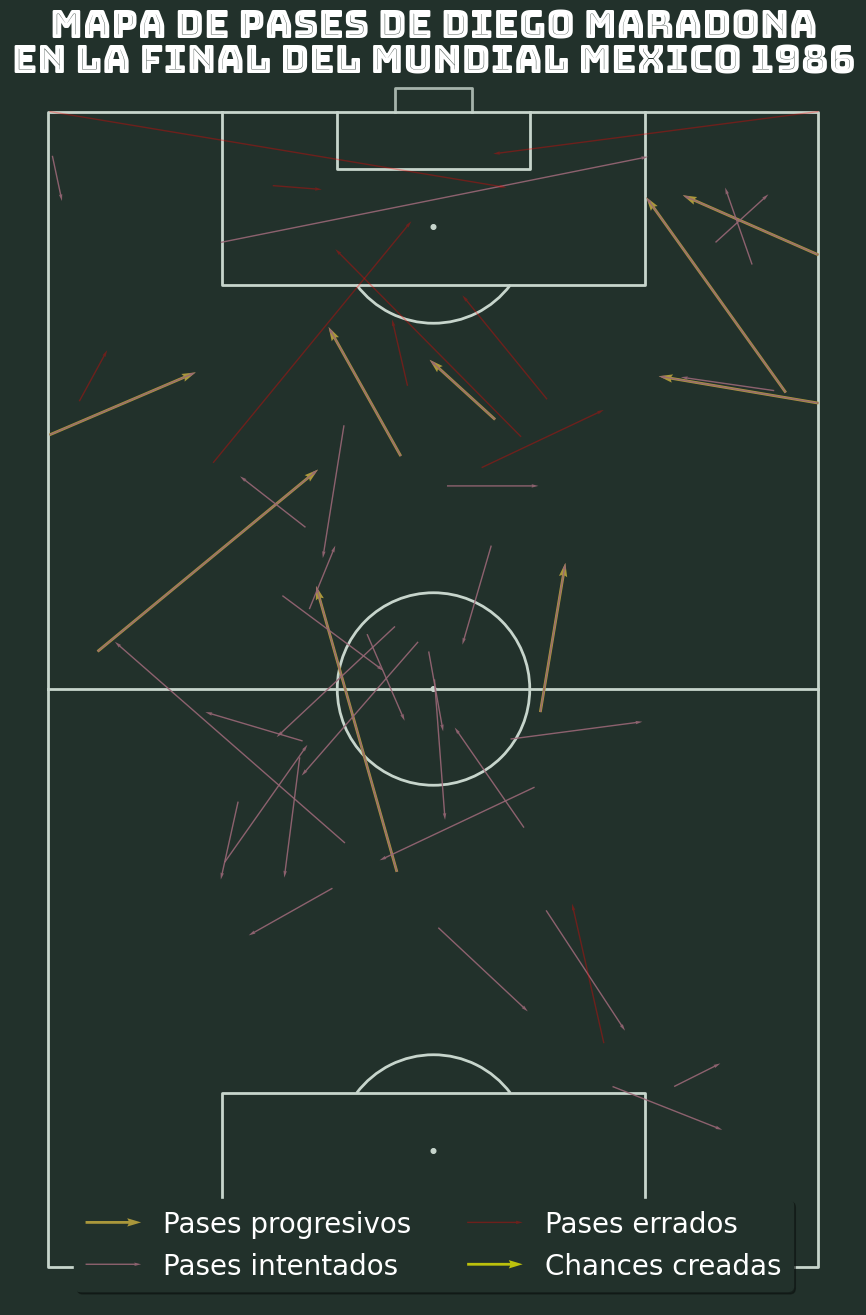

In [48]:
fig, ax = plt.subplots(figsize=(27,16))
facecolor = '#22312b'
fig.set_facecolor(facecolor)
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
pitch.draw(ax=ax)


progresivos = pases_correctos[pases_correctos['progressive'] == True]

lc4 = pitch.arrows(progresivos['x'], progresivos['y'],progresivos['endx'], progresivos['endy'],width=2, headwidth=3, label='Pases progresivos', color='#ad993c', ax=ax, alpha=.99)
lc1 = pitch.arrows(pases_correctos['x'], pases_correctos['y'], pases_correctos['endx'], pases_correctos['endy'], width=1, headwidth=2.5, label='Pases intentados', alpha=.9, color='#996776', ax=ax)
lc2 = pitch.arrows(pases_errados['x'], pases_errados['y'], pases_errados['endx'], pases_errados['endy'], width=1, headwidth=2.5, alpha=.34, color='red', ax=ax, label='Pases errados')
lc = pitch.arrows(pases_clave['x'], pases_clave['y'], pases_clave['endx'], pases_clave['endy'], width=2, headwidth=3, alpha=.7, color='yellow', ax=ax, label='Chances creadas')
#lc3 = pitch.arrows(asistencias['x'], asistencias['y'], asistencias['endx'], asistencias['endy'], width=2.3, headwidth=3.3, alpha=.99, color='yellow', ax=ax, label='Asistencias')

l = ax.legend(shadow=True, loc='lower center', ncol=2, prop={'size': 20}, facecolor='#22312b', edgecolor='#22312b')
for text in l.get_texts():
    text.set_color("white")

plt.title('Mapa de pases de Diego Maradona\nen la Final del Mundial Mexico 1986', color='white', va='center', ha='center', fontproperties=titulo.prop, fontsize=28)

plt.savefig('test1.png',dpi=300, bbox_inches='tight')